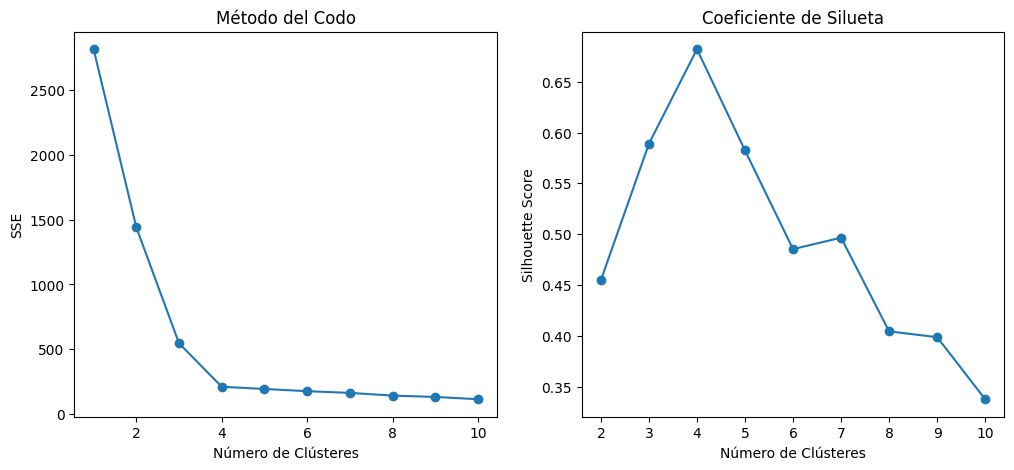

El número óptimo de clústeres según el coeficiente de silueta es: 4


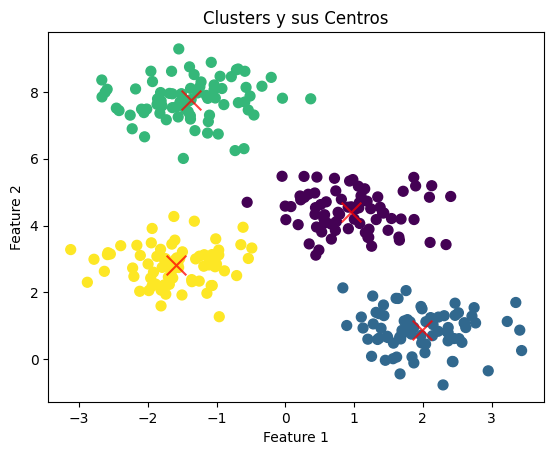

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

# Generar datos sintéticos
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Método del Codo
sse = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    sse.append(kmeans.inertia_)

# Coeficiente de Silueta
silhouette_scores = []
for k in k_values[1:]:  # Silhouette score no está definido para k=1
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el método del codo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clústeres')
plt.ylabel('SSE')

# Graficar el coeficiente de silueta
plt.subplot(1, 2, 2)
plt.plot(k_values[1:], silhouette_scores, marker='o')
plt.title('Coeficiente de Silueta')
plt.xlabel('Número de Clústeres')
plt.ylabel('Silhouette Score')

plt.show()

# Seleccionar el número óptimo de clústeres basado en el coeficiente de silueta
optimal_k = k_values[1:][np.argmax(silhouette_scores)]
print(f"El número óptimo de clústeres según el coeficiente de silueta es: {optimal_k}")

# Aplicar k-means con el número óptimo de clústeres
kmeans = KMeans(n_clusters=optimal_k, random_state=0).fit(X)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Visualizar los datos y los centros de los clústeres
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title("Clusters y sus Centros")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()